# **YB 2조 미니프로젝트(1)**

# **라이브러리 및 데이터**

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 데이터 불러오기

train=pd.read_csv("/content/drive/MyDrive/EWHA/ESAA/ESAA_YB_미니프로젝트1/movies_train.csv")

# **데이터 전처리**

##**title, distributor, genre**

### distributor

In [5]:
# 'distributor' 칼럼의 데이터 종류 파악
train['distributor'].unique()

array(['롯데엔터테인먼트', '(주)쇼박스', '(주)NEW', '쇼박스(주)미디어플렉스', '백두대간',
       '유니버설픽쳐스인터내셔널코리아', '(주)두타연', '(주) 케이알씨지', '(주)콘텐츠 윙', '(주)키노아이',
       '(주)팝 파트너스', 'CJ E&M 영화부문', '(주) 영화제작전원사', 'CJ E&M Pictures',
       'CGV 무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CJ 엔터테인먼트', 'CGV아트하우스', '조이앤시네마',
       '인디플러그', '콘텐츠판다', '인디스토리', '(주)팝엔터테인먼트', '시네마서비스', '웃기씨네',
       '영화사 진진', '(주)레인보우 팩토리', '김기덕 필름', 'NEW', 'CJ CGV',
       '동국대학교 충무로영상제작센터', 'BoXoo 엔터테인먼트', '(주)마운틴픽쳐스', 'CGV 아트하우스',
       '메가박스(주)플러스엠', '골든타이드픽처스', '파이오니아21', '디 씨드', '드림팩트 엔터테인먼트', '시너지',
       '디마엔터테인먼트', '판다미디어', '(주)스톰픽쳐스코리아', '(주)예지림 엔터테인먼트', '(주) 영화사조제',
       '보람엔터테인먼트', '(주)시네마달', '노바엔터테인먼트', '(주)패스파인더씨앤씨', '(주)대명문화공장',
       '(주)온비즈넷', 'KT&G 상상마당', '무비꼴라쥬', '인벤트 디', '씨네그루(주)키다리이엔티',
       '스튜디오후크', '시네마 달', '나이너스엔터테인먼트(주)', 'THE 픽쳐스', '영구아트무비', '리틀빅픽쳐스',
       '어뮤즈', '이모션 픽처스', '(주)이스트스카이필름', '필라멘트 픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴 픽처스', '(주)휘엔터테인먼트', '이십세기폭스코리아(주)', '(주)피터팬픽쳐스', '에스와이코마드',
       '(주)더픽쳐스', '오퍼스픽쳐스'

train['distributor'] 데이터의 문제점

1. 공백 문제로 인해 같이 배급사가 다른 배급사로 취급 -> 문자간 공백 제거 필요
- 'CGV 아트하우스', 'CGV아트하우스'
- '와이드 릴리즈(주)', '와이드릴리즈(주)'
- '(주)마인스 엔터테인먼트', '(주)마인스엔터테인먼트'
- '시네마 달', '시네마달'

2. 맞춤법 틀린 경우 -> 교정
- '리틀빅픽처스', '리틀빅픽쳐스'

3. 이름 일부를 누락한 경우 -> 수동으로 해결
- 'CGV 무비꼴라쥬','무비꼴라쥬'

4. 같은 배급사임에도 불구하고 '(주)' 를 이름에 붙이지 않아 다른 배급사로 취급 -> 수동으로 해결
- '(주)마운틴픽쳐스', '마운틴 픽처스'
- '(주)NEW', 'NEW'
- '(주)리틀빅픽처스', '리틀빅픽처스'
- '(주)드림팩트엔터테인먼트','드림팩트 엔터테인먼트'
- (주)에이원 엔터테인먼트,'에이원 엔터테인먼트'

5. 두 가지 이상 제작사가 있는 경우 -> 두 가지 제작사를 하나의 제작사로 간주
- '더픽쳐스/(주)마운틴픽쳐스'
- '쇼박스(주)미디어플렉스'

In [6]:
## 1. 공백 문제 해결

# 1. 영어와 한글 간 공백 제거 (한글-영어 간, 영어-한글 간 모두 처리)
train['distributor'] = train['distributor'].str.replace(r'([a-zA-Z])\s+([가-힣])', r'\1\2', regex=True)  # 영어-한글 간 공백 제거
train['distributor'] = train['distributor'].str.replace(r'([가-힣])\s+([a-zA-Z])', r'\1\2', regex=True)  # 한글-영어 간 공백 제거

# 2. 그 외 모든 공백 제거 (한글과 한글 사이 등)
train['distributor'] = train['distributor'].str.replace(r'\s+', '', regex=True)

# 3. "(주)"가 뒤에 있거나 중간에 있는 경우 이를 모두 앞쪽으로 이동 (특수 문자 포함)
train['distributor'] = train['distributor'].str.replace(r'(.+)\(주\)', r'(주)\1', regex=True)

# 4. 특수 문자 '\x01' 제거
train['distributor'] = train['distributor'].str.replace(r'\x01', '', regex=True)

# 5. 최종 공백 정리
train['distributor'] = train['distributor'].str.strip()

print(train['distributor'].unique())

['롯데엔터테인먼트' '(주)쇼박스' '(주)NEW' '(주)쇼박스미디어플렉스' '백두대간' '유니버설픽쳐스인터내셔널코리아'
 '(주)두타연' '(주)케이알씨지' '(주)콘텐츠윙' '(주)키노아이' '(주)팝파트너스' 'CJE&M영화부문'
 '(주)영화제작전원사' 'CJE&MPictures' 'CGV무비꼴라쥬' '리틀빅픽처스' '스폰지' 'CJ엔터테인먼트'
 'CGV아트하우스' '조이앤시네마' '인디플러그' '콘텐츠판다' '인디스토리' '(주)팝엔터테인먼트' '시네마서비스' '웃기씨네'
 '영화사진진' '(주)레인보우팩토리' '김기덕필름' 'NEW' 'CJCGV' '동국대학교충무로영상제작센터' 'BoXoo엔터테인먼트'
 '(주)마운틴픽쳐스' '(주)메가박스플러스엠' '골든타이드픽처스' '파이오니아21' '디씨드' '드림팩트엔터테인먼트' '시너지'
 '디마엔터테인먼트' '판다미디어' '(주)스톰픽쳐스코리아' '(주)예지림엔터테인먼트' '(주)영화사조제' '보람엔터테인먼트'
 '(주)시네마달' '노바엔터테인먼트' '(주)패스파인더씨앤씨' '(주)대명문화공장' '(주)온비즈넷' 'KT&G상상마당'
 '무비꼴라쥬' '인벤트디' '(주)씨네그루키다리이엔티' '스튜디오후크' '시네마달' '(주)나이너스엔터테인먼트' 'THE픽쳐스'
 '영구아트무비' '리틀빅픽쳐스' '어뮤즈' '이모션픽처스' '(주)이스트스카이필름' '필라멘트픽쳐스' '조이앤컨텐츠그룹'
 '타임스토리그룹' '마운틴픽처스' '(주)휘엔터테인먼트' '(주)이십세기폭스코리아' '(주)피터팬픽쳐스' '에스와이코마드'
 '(주)더픽쳐스' '오퍼스픽쳐스' '(주)고앤고필름' '사람과사람들' '(주)JK필름' '(주)씨너스엔터테인먼트' 'KT'
 '싸이더스FNH' '(주)프레인글로벌' '나우콘텐츠' '홀리가든' '(주)브릿지웍스' '(주)엣나인필름' '위더스필름'
 '(주)에이원엔터테인먼트' 'OAL(올)' '싸이더스' '전망좋은영화사' '스토리셋' '이상우필름' '씨네굿필름' '영희야놀자'
 '찬란' '어썸피플' '

In [7]:
## 2.맞춤법 교정 : '리틀빅픽처스', '리틀빅픽쳐스'
train['distributor'] = train['distributor'].replace({r'리틀빅픽쳐스': '리틀빅픽처스'}, regex=True)

In [8]:
## 3. 누락한 이름 수정 : 'CGV 무비꼴라쥬','무비꼴라쥬'
train['distributor'] = train['distributor'].replace({r'^무비꼴라쥬$': 'CGV무비꼴라쥬'}, regex=True)

In [9]:
## 4. 이름 통일
# 수동으로 매핑 테이블 생성 (딕셔너리 사용)
distributor_mapping = {
    '마운틴픽처스': '(주)마운틴픽쳐스',
    'NEW': '(주)NEW',
    '리틀빅픽처스': '(주)리틀빅픽처스',
    '드림팩트엔터테인먼트': '(주)드림팩트엔터테인먼트',
    '에이원엔터테인먼트': '(주)에이원 엔터테인먼트'
}

# 배급사 컬럼에 매핑 적용
train['distributor'] = train['distributor'].replace(distributor_mapping)

# 결과 확인
print(train['distributor'].unique())

['롯데엔터테인먼트' '(주)쇼박스' '(주)NEW' '(주)쇼박스미디어플렉스' '백두대간' '유니버설픽쳐스인터내셔널코리아'
 '(주)두타연' '(주)케이알씨지' '(주)콘텐츠윙' '(주)키노아이' '(주)팝파트너스' 'CJE&M영화부문'
 '(주)영화제작전원사' 'CJE&MPictures' 'CGV무비꼴라쥬' '(주)리틀빅픽처스' '스폰지' 'CJ엔터테인먼트'
 'CGV아트하우스' '조이앤시네마' '인디플러그' '콘텐츠판다' '인디스토리' '(주)팝엔터테인먼트' '시네마서비스' '웃기씨네'
 '영화사진진' '(주)레인보우팩토리' '김기덕필름' 'CJCGV' '동국대학교충무로영상제작센터' 'BoXoo엔터테인먼트'
 '(주)마운틴픽쳐스' '(주)메가박스플러스엠' '골든타이드픽처스' '파이오니아21' '디씨드' '(주)드림팩트엔터테인먼트'
 '시너지' '디마엔터테인먼트' '판다미디어' '(주)스톰픽쳐스코리아' '(주)예지림엔터테인먼트' '(주)영화사조제'
 '보람엔터테인먼트' '(주)시네마달' '노바엔터테인먼트' '(주)패스파인더씨앤씨' '(주)대명문화공장' '(주)온비즈넷'
 'KT&G상상마당' '인벤트디' '(주)씨네그루키다리이엔티' '스튜디오후크' '시네마달' '(주)나이너스엔터테인먼트'
 'THE픽쳐스' '영구아트무비' '어뮤즈' '이모션픽처스' '(주)이스트스카이필름' '필라멘트픽쳐스' '조이앤컨텐츠그룹'
 '타임스토리그룹' '(주)휘엔터테인먼트' '(주)이십세기폭스코리아' '(주)피터팬픽쳐스' '에스와이코마드' '(주)더픽쳐스'
 '오퍼스픽쳐스' '(주)고앤고필름' '사람과사람들' '(주)JK필름' '(주)씨너스엔터테인먼트' 'KT' '싸이더스FNH'
 '(주)프레인글로벌' '나우콘텐츠' '홀리가든' '(주)브릿지웍스' '(주)엣나인필름' '위더스필름' '(주)에이원엔터테인먼트'
 'OAL(올)' '싸이더스' '전망좋은영화사' '스토리셋' '이상우필름' '씨네굿필름' '영희야놀자' '찬란' '어썸피플'
 '아방가르드필름' '스크린조이' '(주)와이드릴리

## **release_time, time, screening_rate**

In [10]:
train.shape[0]

600

In [11]:
train.head(10)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,(주)쇼박스미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.00,3,342,2,1110523
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [13]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [14]:
train.isna().sum()

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,330
dir_prev_num,0
num_staff,0


### release_time

datetime 오브젝트로 변환

In [15]:
from datetime import datetime
import os

train['release_time']=pd.to_datetime(train['release_time'])

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  270 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 56.4+ KB


### screening_rate
이후 그래프 생성할 때 경고 문구 뜨지 않기 위해 생략, 한글로 된 변수명 그대로 사용


In [16]:
# print(train['screening_rat'].unique())


*   청소년 관람불가 : 19_rated
*   15세 관람가 : 15_rated
*   12세 관람가 : 12_rated
*   전체 관람가 : G_rated

In [17]:
# train['screening_rat'] = train['screening_rat'].replace('청소년 관람불가', '19_rated')
# train['screening_rat'] = train['screening_rat'].replace('15세 관람가', '15_rated')
# train['screening_rat'] = train['screening_rat'].replace('12세 관람가', '12_rated')
# train['screening_rat'] = train['screening_rat'].replace('전체 관람가', 'G_rated')

# print(train['screening_rat'].unique())

# print(train['screening_rat'].head(10))

## **num_actor, num_staff, box_off_num**

### 결측치 확인

결과: 결측치 없음

In [18]:
na_movies_train = train['num_actor'].isna()

# False 값의 개수 (True로 반전 후 합산)
false_count = (~na_movies_train).sum()
print(false_count)

true_count = (na_movies_train).sum()
print(true_count)

600
0


In [19]:
na_movies_train = train['num_staff'].isna()

# False 값의 개수 (True로 반전 후 합산)
false_count = (~na_movies_train).sum()
print(false_count)
true_count = (na_movies_train).sum()
print(true_count)

600
0


In [20]:
na_movies_train = train['box_off_num'].isna()

# False 값의 개수 (True로 반전 후 합산)
false_count = (~na_movies_train).sum()
print(false_count)
true_count = (na_movies_train).sum()
print(true_count)

600
0


### 이상치 대체

IQR 사용해서 Q1 - 1.5 * IQR 값보다 작거나 Q3 = df[column].quantile(0.75) 보다 크면 각각 최솟값 최댓값으로 바꾸기

In [21]:
train_data_df = train.copy()

In [22]:
train_data = train_data_df[['num_staff', 'num_actor','box_off_num']]

In [23]:
# 3. 이상치 처리 (IQR 방식으로 대체)
def replace_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 하한선보다 작은 값은 하한선으로 대체
    df.loc[df[column] < lower_bound, column] = lower_bound
    # 상한선보다 큰 값은 상한선으로 대체
    df.loc[df[column] > upper_bound, column] = upper_bound

In [24]:
replace_outliers(train_data, 'num_staff')
replace_outliers(train_data, 'num_actor')
replace_outliers(train_data, 'box_off_num')

### 각각의 비율 나타내기

결과값은 ratio_movies_train에 저장함

각각의 변수 추출

In [25]:
ratio_movies_train = train.copy()

In [26]:
train_num_staff = train['num_staff']
train_num_actor = train['num_actor']
train_box_off_num = train['box_off_num']

각각의 총합계산

In [27]:
total_train_num_staff = train_num_staff.sum()
total_train_num_actor = train_num_actor.sum()
total_box_off_num = train_box_off_num.sum()

In [28]:
ratio_movies_train['num_staff'] = train_num_staff / total_train_num_staff
ratio_movies_train['num_actor'] = train_num_actor / total_train_num_actor
ratio_movies_train['box_off_num'] = train_box_off_num / total_box_off_num

In [29]:
print(ratio_movies_train[['num_staff','num_actor','box_off_num']].head())

   num_staff  num_actor  box_off_num
0   0.001004   0.000899     0.000055
1   0.004268   0.001349     0.016645
2   0.003783   0.001799     0.016378
3   0.000221   0.002698     0.000513
4   0.002768   0.000899     0.001138


## **director, dir_prev_bfnum, dir_prev_num**

###**dir_prev_bfnum**

In [30]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,(주)쇼박스미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  270 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 56.4+ KB


In [32]:
# null값을 평균값으로 대체
train['dir_prev_bfnum'] = train['dir_prev_bfnum'].fillna(train['dir_prev_bfnum'].mean())

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 56.4+ KB


In [34]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,1.050443e+06,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1.161602e+06,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,2.207752e+05,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,2.389400e+04,2,20,6,217866
4,불량남녀,(주)쇼박스미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.000000e+00,1,251,2,483387


In [35]:
unique_ratings = train['screening_rat'].unique()
print(unique_ratings)

['청소년 관람불가' '15세 관람가' '전체 관람가' '12세 관람가']


In [36]:
rating_counts = train['screening_rat'].value_counts()
print(rating_counts)

screening_rat
청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: count, dtype: int64


## **최종 결과**

In [37]:
train.head(10)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,1.050443e+06,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1.161602e+06,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,2.207752e+05,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,2.389400e+04,2,20,6,217866
4,불량남녀,(주)쇼박스미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.000000e+00,1,251,2,483387
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,8.379690e+05,2,262,4,233211
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,1.050443e+06,0,32,5,53526
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,7.395220e+05,3,342,2,1110523
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,1.050443e+06,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,1.050443e+06,0,138,3,868


# **시각화**

### **장르별 상영시간과 평균 관객수의 관계**
상영시간과 평균 관객수가 어떠한 관계가 있는지 산점도 및 회귀직선을 통해 알아보고, 장르별로 또한 어떠한 관계가 있는지 버블차트를 통해 분석

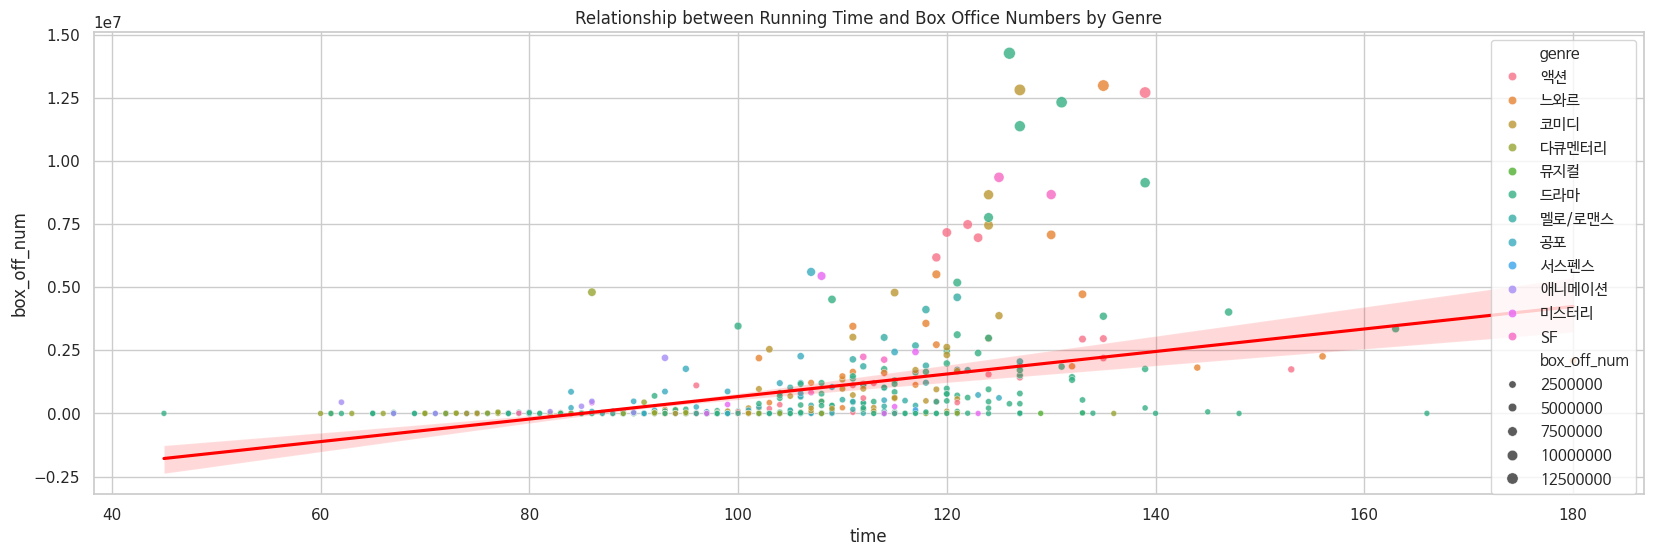

In [38]:
# 버블차트를 활용하여 시각화
## 상영시간과 평균 관객수의 관계
sns.set(style="whitegrid") # Seaborn 스타일 적용. 흰색 배경에 그리드 라인 표시

plt.figure(figsize=(20,6))

plt.xlabel('time')
plt.ylabel('box_office_number')
plt.title('Relationship between Running Time and Box Office Numbers by Genre',fontsize=12)

plt.rcParams['font.family'] = 'NanumBarunGothic' # 한글 깨짐 방지

# 상영시간과 관객수의 관계를 알아보기 위해 scatterplot으로 시각화
# 장르별 상영시간과 관객수의 관계를 알아보기 위해 size = 'box_off_num' 로 설정하여 관객수에 비례하여 버블 크기 조정
sns.scatterplot(x='time',y='box_off_num',hue='genre',size='box_off_num',data=train,alpha=0.8)

# 회귀선 추가하여 상관관계를 가시적으로 파악
sns.regplot(x='time', y='box_off_num', data=train, scatter=False, color='red')
plt.show()

# 회귀선을 통해 상영시간이 특정 범위까지 증가함에 따라 평균 관객수가 증가하는 경향이 있음을 파악. 이는 관객 수가 높은 영화들이 주로 이 범위의 상영 시간을 갖는다는 것을 시사함.
# 상영 시간이 길수록 관객 수가 급격히 증가하는 경향은 보이지 않음.
# 회귀직선이 데이터를 잘 fitting 하지 않음. 여러 요인이 있을 수 있음.

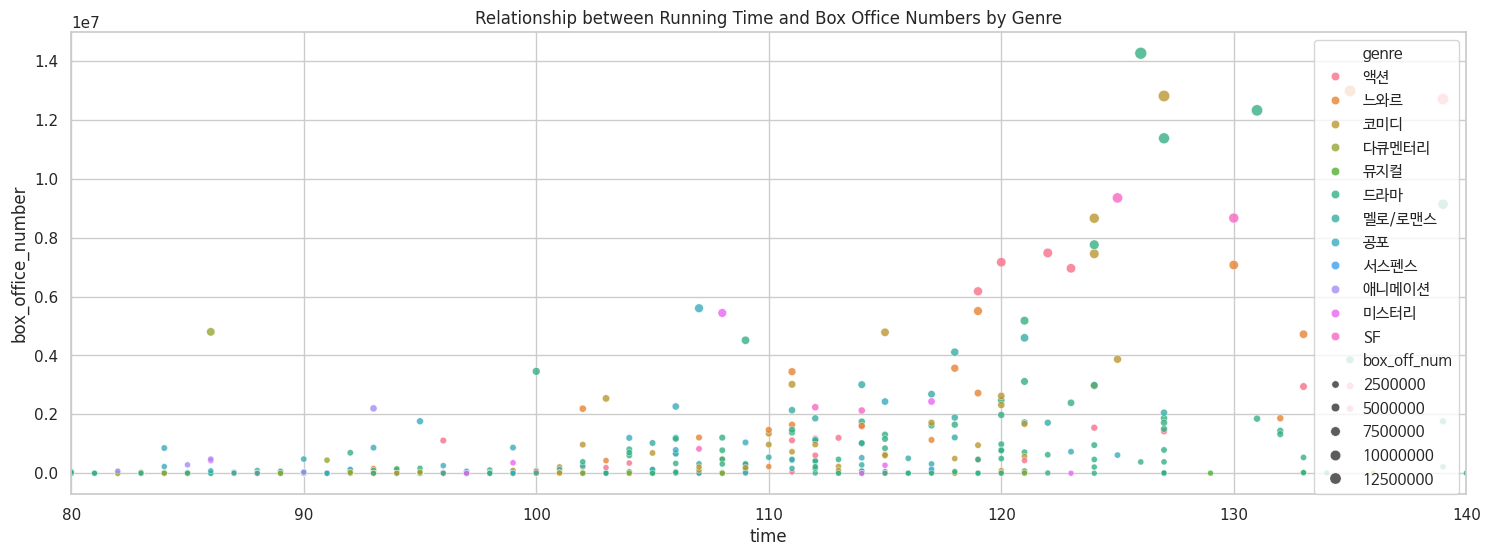

In [39]:
## x의 범위를 데이터가 많이 분포된 (80,140)으로 설정하여 장르별 상영시간과 평균 관객수의 관계를 파악
sns.set(style="whitegrid")
plt.figure(figsize=(18,6))

plt.xlim(80,140)

plt.xlabel('time')
plt.ylabel('box_office_number')
plt.title('Relationship between Running Time and Box Office Numbers by Genre',fontsize=12)
plt.rcParams['font.family'] = 'NanumBarunGothic'
sns.scatterplot(x='time',y='box_off_num',hue='genre',size='box_off_num',data=train,alpha=0.8)
plt.show()

# 다양한 장르들이 특정 상영 시간대에 집중되어 있음. 예를 들어, 액션(주황색)과 느와르(연보라색)영화들은 주로 상영 시간이 120분을 초과하는 경향이 있음.
# 코미디(연두색)나 애니메이션(하늘색) 장르는 상대적으로 짧은 상영 시간(80~100분)에 분포하며, 이러한 장르들은 대체로 관객 수가 낮은 경향을 보임.
# 드라마(갈색) 장르도 고르게 분포되어 있지만, 상영 시간이 100~130분 사이에 속하는 영화들이 더 큰 버블로 나타나 관객 수가 높음.

# 결론: 대체로 상영 시간이 100~130분인 영화들이 높은 관객 수를 기록하는 경향이 있으며, 특히 액션과 느와르 같은 장르에서 이런 패턴이 두드러짐.
# 코미디나 애니메이션 영화들은 대체로 짧은 상영 시간 동안 관객 수가 비교적 적은 경향을 보임.
# 하지만 상영 시간이 길다고 반드시 관객 수가 높은 것은 아니며, 영화 상영시간 이외에 다양한 변수들이 관객수에 영향을 미친다는 것을 회귀직선을 통해 알 수 있음.

### **신인 감독 vs. 베테랑 감독**

신인 감독(과거 작품 수 0-1), 베테랑 감독(과거 작품 수 2-)으로 분류하여 감독의 경력에 따른 관객수에 차이가 있는지 분석

In [40]:
# 신입 감독과 베테랑 감독 분류
# 이전까지 제작에 참여한 영화의 개수를 통해 신입과 베테랑 감독으로 분류. 신입감독은 과거 작품수가 0~1개, 베테랑 감독은 2개 이상으로 기준 설정
dir = train.groupby(['director'])['dir_prev_bfnum'].size().reset_index()
dir['experience']=dir['dir_prev_bfnum'].apply(lambda x:'new' if x<2 else 'veteran')
dir.index=dir['director']
dir.drop(columns=['director'],inplace=True)

In [41]:
# train DataFrame에 'experience'라는 칼럼을 새로 추가
train['experience'] = None

# for문을 통해 앞서 분류한 결과를 기입
for index,experience in zip(dir.index, dir['experience']):
  train.loc[train['director'] == index,'experience'] = experience

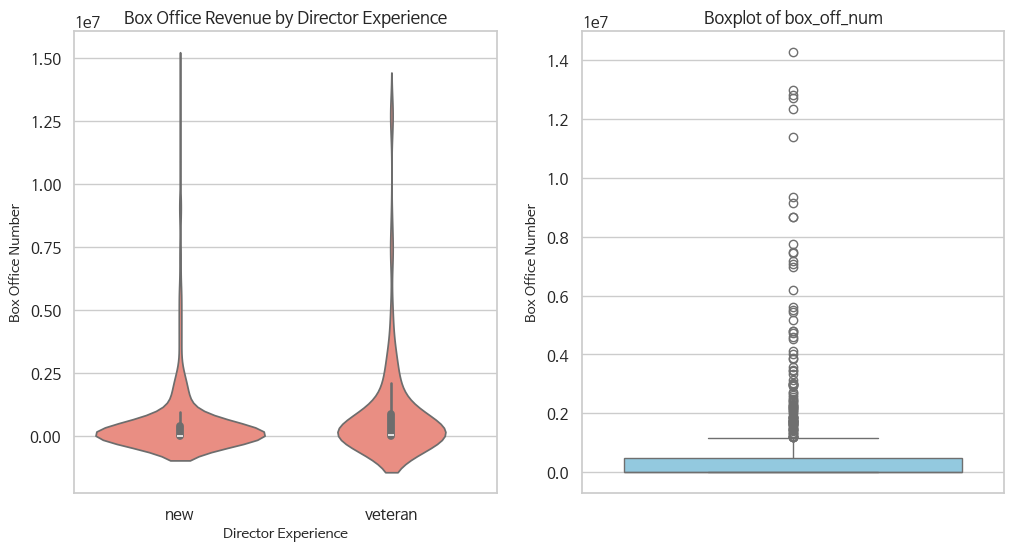

In [42]:
# 시각화
# violinplot, boxplot 두 개를 그리기 위해 아래와 같이 설정
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))

sns.violinplot(x='experience', y='box_off_num', data = train,color='salmon',ax=ax[0])
sns.boxplot(y='box_off_num',data=train,ax=ax[1],color='skyblue')

# 레이블 설정
ax[0].set_xlabel('Director Experience',fontsize=10)
ax[0].set_ylabel('Box Office Number',fontsize=10)
ax[1].set_ylabel('Box Office Number',fontsize=10)
# 제목 설정
ax[0].set_title('Box Office Revenue by Director Experience')
ax[1].set_title('Boxplot of box_off_num')

plt.show()

# 오른쪽 그림을 통해 전체 데이터의 관객수 평균이 1만명인 알 수 있으며, 또한 100만 관객수부터 14000만 관객수까지 다양한 데이터가 있는 것을 알 수 있음.

# 신입감독의 경우, 전체데이터의 평균과 같이 1만명대 관객수가 제일 많고, 베테랑 감독보다 평균 근처에서 플롯이 두꺼운 것으로 보아 1만명대 관객이 많음.
# 플롯의 한쪽 부분이 뾰족한 것을 통해 특정 감독들의 영화가 높은 관객수를 기록한 것을 알 수 있음

# 베테랑 감독의 경우, 전체 데이터의 평균과 비슷하거나 조금 높게 1만~3만명 관객수가 제일 많으며, 신입감독보다는 관객수가 평균보다 큰값에 다양하게 분포되어 있는 것을 알 수 있음.
# 플롯의 한쪽 부분이 뾰족한 것을 통해 특정 감독들의 영화가 높은 관객수를 기록한 것을 알 수 있음

### **상위 5개 배급사별 영화 수와 평균 관객수 관계**
상위 5개 배급사별로 제작한 영화 수와 평균 관객수에 어떠한 관계가 있는지 분석

In [43]:
# 먼저, 상위 10개 배급사 선정
# 주어진 데이터셋에서 가장 많은 영화를 제작한 배급사들을 상위 10위 배급사로 선정
train_distributor_10 = train['distributor'].value_counts()[:10] # value_counts를 하게 되면 내림차순으로 정렬
train_distributor_10

,count
distributor,
CJ엔터테인먼트,54
롯데엔터테인먼트,52
(주)NEW,38
(주)마운틴픽쳐스,32
(주)쇼박스,26
인디스토리,26
시네마달,16
골든타이드픽처스,15
(주)케이알씨지,14


In [44]:
# 상위 10개 배급사의 평균 관객수
box_off_mean_10 = []
for index in train_distributor_10.index:
  dist_box_off_num = train.loc[train['distributor']==index,'box_off_num'].mean()
  box_off_mean_10.append(dist_box_off_num)
box_off_mean_10.sort(reverse=True)
box_off_mean_10 # 상위 10개 배급사의 평균 관객수가 너무 큰 편차를 보임에 따라 상위 5개만 분석하기로 결정

[3386656.3076923075,
 2162742.462962963,
 1939059.9473684211,
 1238148.9423076923,
 456663.6,
 29391.5625,
 9257.9375,
 5210.576923076923,
 4373.2,
 1027.2857142857142]

In [45]:
# 상위 5개 배급사 선정
train_distributor_5 = train['distributor'].value_counts()[:5]
print(train_distributor_5)

# 상위 5개 배급사의 평균 관객수
box_off_mean_5 = []
for index in train_distributor_5.index:
  dist_box_off_num = train.loc[train['distributor']==index,'box_off_num'].mean()
  box_off_mean_5.append(dist_box_off_num)
box_off_mean_5.sort(reverse=True)
print(box_off_mean_5)

distributor
CJ엔터테인먼트     54
롯데엔터테인먼트     52
(주)NEW       38
(주)마운틴픽쳐스    32
(주)쇼박스       26
Name: count, dtype: int64
[3386656.3076923075, 2162742.462962963, 1939059.9473684211, 1238148.9423076923, 29391.5625]


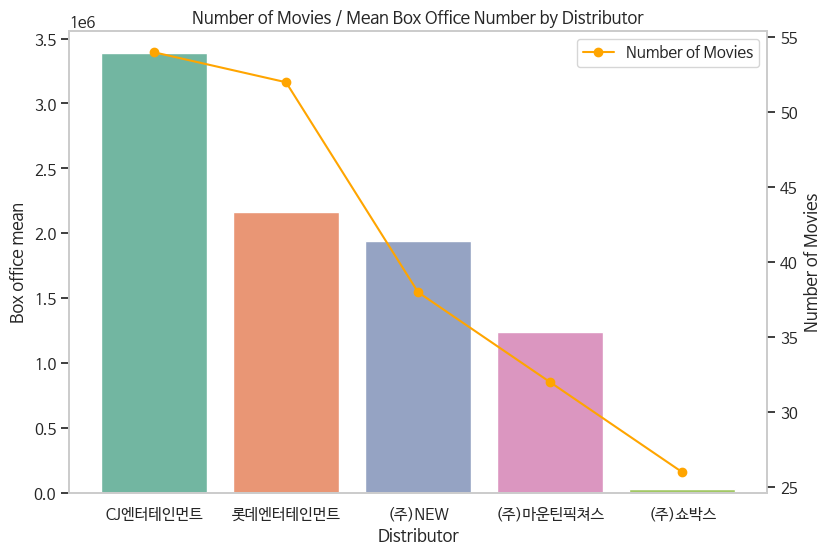

In [46]:
# 배급사별 평균 관객수와 영화수를 분석하기 위해 두 가지 그림을 하나에 시각화함
fig,ax=plt.subplots(figsize=(9,6))

# Barplot을 통해 배급사별 평균 관객수를 시각화
sns.barplot(x=train_distributor_5.index,y=box_off_mean_5,palette='Set2',label='bar chart')
plt.xlabel('Distributor')
plt.ylabel('Box office mean')
plt.grid(False)

# Barplot에 선그래프를 추가하여 배급사별 영화 수를 시각화
ax2=ax.twinx()
ax2.plot(train_distributor_5.index,train_distributor_5.values,color='orange',label='Number of Movies',marker='o')
ax2.set_ylabel('Number of Movies')
ax2.tick_params(axis='y')

plt.title('Number of Movies / Mean Box Office Number by Distributor')
plt.legend(loc='upper right')
plt.grid(False)
plt.show()

# 시각화한 결과를 통해 제작한 영화 개수가 많은 배급사일수록 평균 관객수가 높은 것을 알 수 있음.
# 앞서 상위 10개의 배급사를 선정하였을 때 평균 관객수가 많이 차이난 것으로 보아, 상위 5개 배급사가 영화 시장을 독점하고 있는 것을 알 수 있음

### **개봉일과 장르의 관계: 개봉일에 따른 장르의 변화**

In [47]:
train['release_time']=pd.to_datetime(train['release_time'])
print(train['release_time'])

print(train['genre'])

0     2012-11-22
1     2015-11-19
2     2013-06-05
3     2012-07-12
4     2010-11-04
         ...    
595   2014-08-13
596   2013-03-14
597   2010-09-30
598   2015-05-14
599   2013-01-30
Name: release_time, Length: 600, dtype: datetime64[ns]
0       액션
1      느와르
2       액션
3      코미디
4      코미디
      ... 
595    드라마
596    드라마
597     공포
598    느와르
599     액션
Name: genre, Length: 600, dtype: object


In [48]:
print(train['genre'].unique())

['액션' '느와르' '코미디' '다큐멘터리' '뮤지컬' '드라마' '멜로/로맨스' '공포' '서스펜스' '애니메이션' '미스터리'
 'SF']


**Train - 전체**

In [49]:
train['release_year_month'] = train['release_time'].dt.to_period('M')  # Period 객체로 변환
genre_grouped = train.groupby(['genre', 'release_year_month']).size().reset_index(name='count')

# release_year_month에서 연도만 추출 (Period 타입이므로 .dt.year 사용)
genre_grouped['release_year'] = genre_grouped['release_year_month'].dt.year  # 연도만 추출

# count 열이 숫자형인지 확인
genre_grouped['count'] = pd.to_numeric(genre_grouped['count'], errors='coerce')

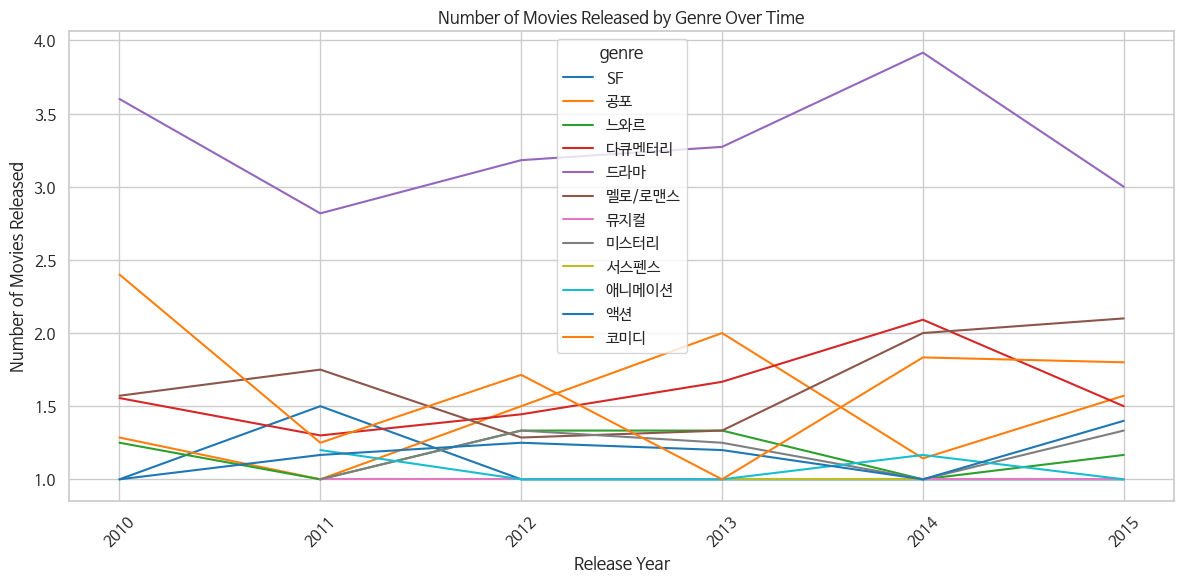

In [50]:
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_grouped, x='release_year', y='count', hue='genre', ci=None, palette='tab10')

plt.title('Number of Movies Released by Genre Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Train-월별**

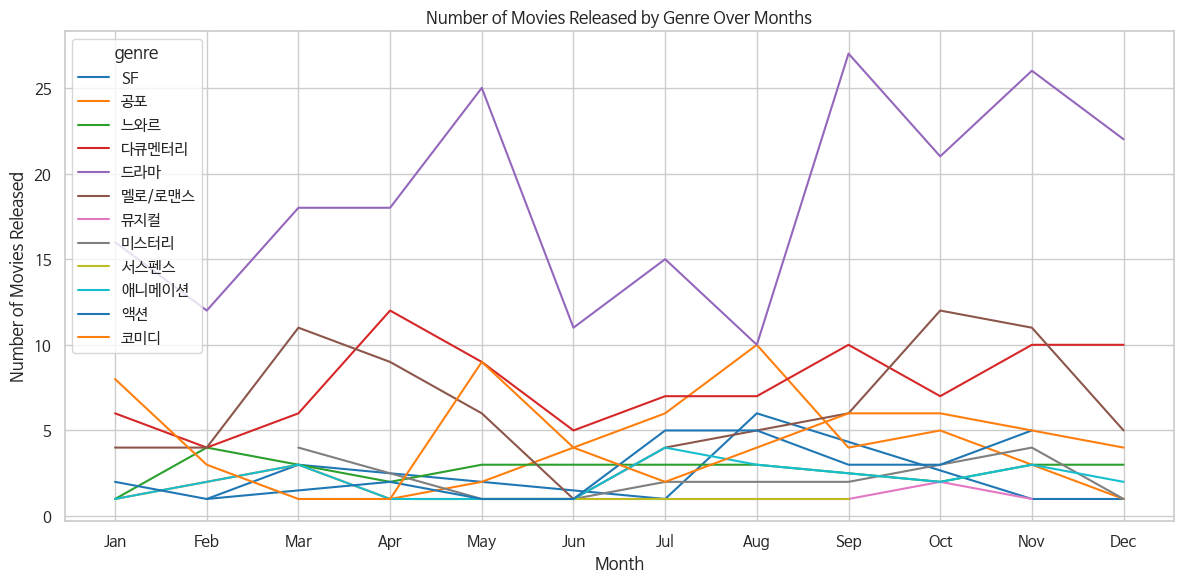

In [51]:
# release_time에서 월만 추출
train['release_month'] = train['release_time'].dt.month  # 월만 추출

# 장르별로 월별 개봉 수를 합산
monthly_genre_grouped = train.groupby(['genre', 'release_month']).size().reset_index(name='count')

import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_genre_grouped, x='release_month', y='count', hue='genre', ci=None, palette='tab10')

plt.title('Number of Movies Released by Genre Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Movies Released')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()

plt.show()


### **관객수와 상영시간의 관계: 관객수와 상영시간 간의 상관관계**

In [52]:
print(train['time'])
print(train['time'].min(), train['time'].max())

0       96
1      130
2      123
3      101
4      108
      ... 
595    111
596    127
597     99
598    102
599    120
Name: time, Length: 600, dtype: int64
45 180


In [53]:
print(train['box_off_num'])
print(train['box_off_num'].min(), train['box_off_num'].max())
print(train['box_off_num'].describe())

0        23398
1      7072501
2      6959083
3       217866
4       483387
        ...   
595    1475091
596    1716438
597       2475
598    2192525
599    7166532
Name: box_off_num, Length: 600, dtype: int64
1 14262766
count    6.000000e+02
mean     7.081818e+05
std      1.828006e+06
min      1.000000e+00
25%      1.297250e+03
50%      1.259100e+04
75%      4.798868e+05
max      1.426277e+07
Name: box_off_num, dtype: float64


In [54]:
#상영시간 기준 그룹화
time_grouped = train.groupby('time')['box_off_num'].sum().reset_index(name='sum_box_num')
print(time_grouped.head(10))
print(time_grouped.describe())

   time  sum_box_num
0    45         2919
1    60          328
2    61          259
3    62       446206
4    63           79
5    65         4681
6    66           65
7    67        52017
8    69         1165
9    70        14890
             time   sum_box_num
count   86.000000  8.600000e+01
mean   104.790698  4.940803e+06
std     28.400131  7.468743e+06
min     45.000000  6.500000e+01
25%     82.250000  5.421925e+04
50%    103.500000  1.259697e+06
75%    124.750000  7.985089e+06
max    180.000000  3.395222e+07


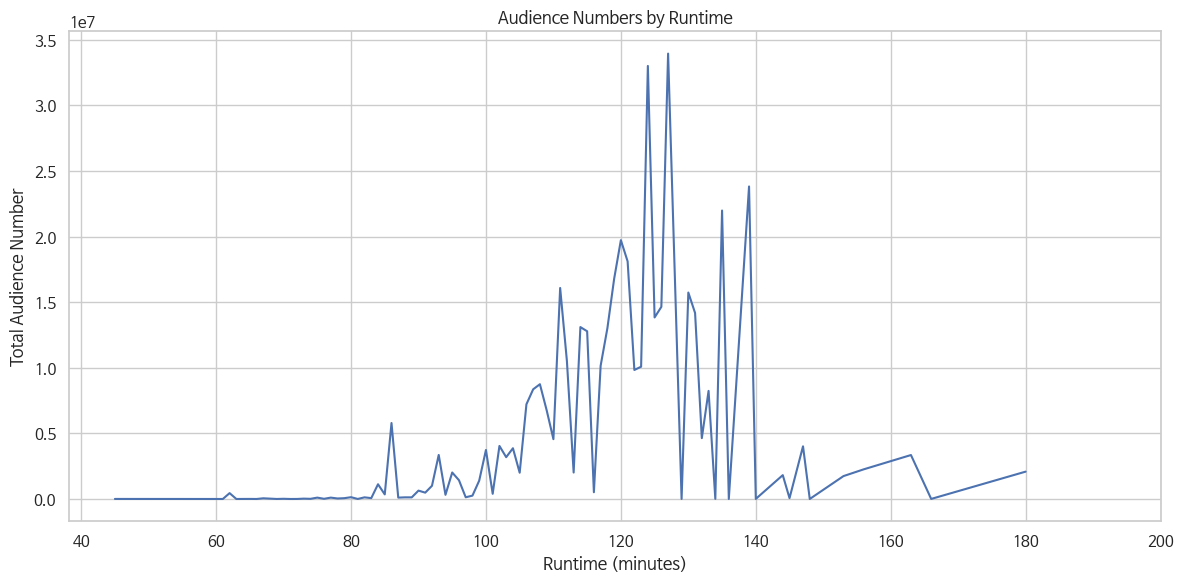

In [55]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='time', y='sum_box_num', data=time_grouped)
plt.xticks(ticks=range(40, 201, 20), labels=range(40, 201, 20))

plt.title('Audience Numbers by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Total Audience Number')

plt.tight_layout()
plt.show()

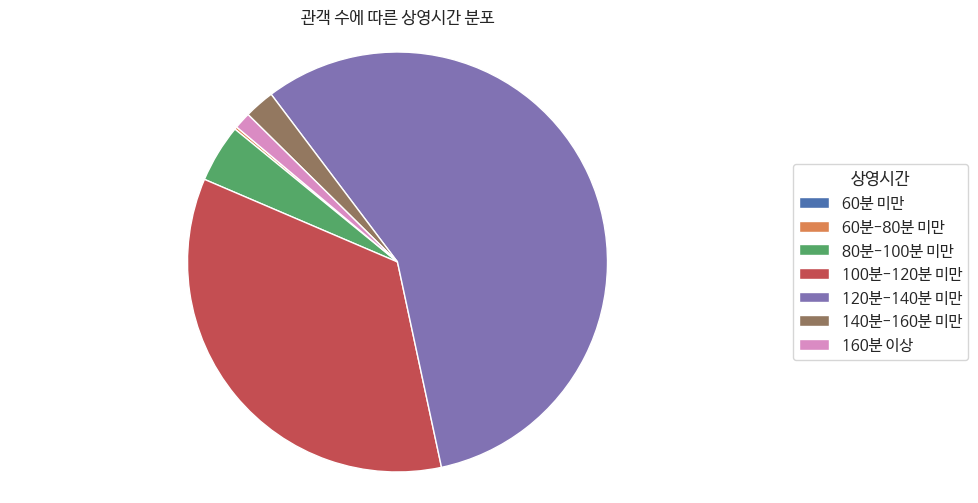

In [56]:
#60분 / 80분 / 100분 / 120분 / 140분 / 160분 기준으로 그룹 간 비교

bins = [0, 60, 80, 100, 120, 140, 160, float('inf')]
labels = ['60분 미만', '60분-80분 미만', '80분-100분 미만', '100분-120분 미만', '120분-140분 미만', '140분-160분 미만', '160분 이상']

time_grouped['time_category'] = pd.cut(time_grouped['time'], bins=bins, labels=labels, right=False)
audience_counts = time_grouped.groupby('time_category')['sum_box_num'].sum()

plt.figure(figsize=(10, 6))
plt.pie(audience_counts, startangle=140, autopct=None)  # 비율 표시 없음
plt.legend(audience_counts.index, title='상영시간', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('관객 수에 따른 상영시간 분포')
plt.axis('equal')
plt.show()


### **배급사별 평균 영화 상영시간**

In [57]:
train['distributor'].unique()

array(['롯데엔터테인먼트', '(주)쇼박스', '(주)NEW', '(주)쇼박스미디어플렉스', '백두대간',
       '유니버설픽쳐스인터내셔널코리아', '(주)두타연', '(주)케이알씨지', '(주)콘텐츠윙', '(주)키노아이',
       '(주)팝파트너스', 'CJE&M영화부문', '(주)영화제작전원사', 'CJE&MPictures', 'CGV무비꼴라쥬',
       '(주)리틀빅픽처스', '스폰지', 'CJ엔터테인먼트', 'CGV아트하우스', '조이앤시네마', '인디플러그',
       '콘텐츠판다', '인디스토리', '(주)팝엔터테인먼트', '시네마서비스', '웃기씨네', '영화사진진',
       '(주)레인보우팩토리', '김기덕필름', 'CJCGV', '동국대학교충무로영상제작센터', 'BoXoo엔터테인먼트',
       '(주)마운틴픽쳐스', '(주)메가박스플러스엠', '골든타이드픽처스', '파이오니아21', '디씨드',
       '(주)드림팩트엔터테인먼트', '시너지', '디마엔터테인먼트', '판다미디어', '(주)스톰픽쳐스코리아',
       '(주)예지림엔터테인먼트', '(주)영화사조제', '보람엔터테인먼트', '(주)시네마달', '노바엔터테인먼트',
       '(주)패스파인더씨앤씨', '(주)대명문화공장', '(주)온비즈넷', 'KT&G상상마당', '인벤트디',
       '(주)씨네그루키다리이엔티', '스튜디오후크', '시네마달', '(주)나이너스엔터테인먼트', 'THE픽쳐스',
       '영구아트무비', '어뮤즈', '이모션픽처스', '(주)이스트스카이필름', '필라멘트픽쳐스', '조이앤컨텐츠그룹',
       '타임스토리그룹', '(주)휘엔터테인먼트', '(주)이십세기폭스코리아', '(주)피터팬픽쳐스', '에스와이코마드',
       '(주)더픽쳐스', '오퍼스픽쳐스', '(주)고앤고필름', '사람과사람들', '(주)JK필름',
       '(주)씨너스엔터테인먼트', 'KT', '싸이더스FNH', '(

In [58]:
distributor_time = train.groupby('distributor')['time'].mean().reset_index(name='avr_time')

print(distributor_time)

    distributor    avr_time
0       (주)JK필름  105.000000
1     (주)KBS미디어   73.000000
2        (주)NEW  111.868421
3      (주)SK텔레콤  111.000000
4      (주)고앤고필름  107.000000
..          ...         ...
153        필름라인   88.000000
154         하준사   82.000000
155   한국YWCA연합회   61.000000
156        홀리가든   91.250000
157      화앤담이엔티  107.000000

[158 rows x 2 columns]


In [59]:
print(distributor_time['avr_time'].describe())

count    158.000000
mean      96.716228
std       14.408971
min       61.000000
25%       86.400000
50%       97.000000
75%      106.500000
max      133.000000
Name: avr_time, dtype: float64


In [60]:
#평균 상영시간 계산하고 그룹화 -> 다시 10분 단위로 구분하여 그룹화
distributor_time = train.groupby('distributor')['time'].mean().reset_index(name='avr_time')

bins = [0, 70, 80, 90, 100, 110, float('inf')]
labels = ['70미만', '70-80미만', '80-90미만', '90-100미만', '100-110미만', '110이상']
distributor_time['time_category'] = pd.cut(distributor_time['avr_time'], bins=bins, labels=labels, right=False)
grouped_counts = distributor_time['time_category'].value_counts()

grouped_distributors = distributor_time.groupby('time_category')['distributor'].apply(list)
grouped_counts = distributor_time['time_category'].value_counts()

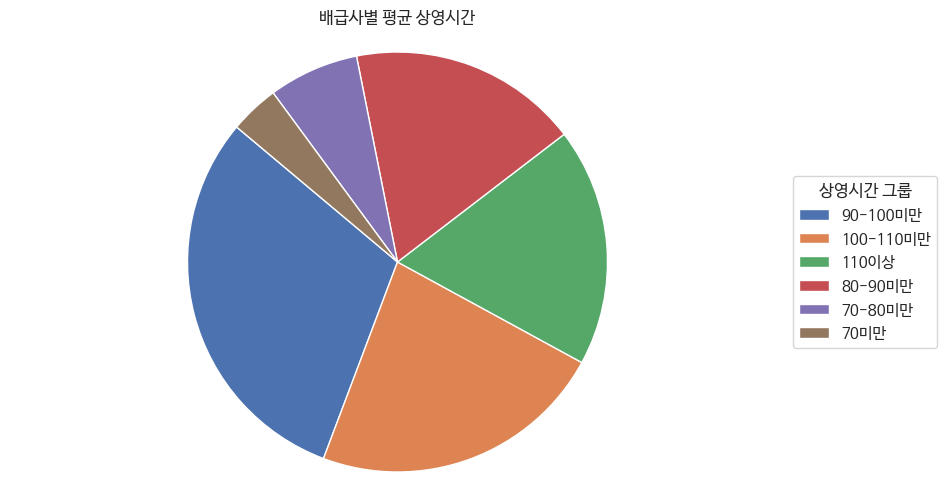

70미만: (주)레인보우팩토리, (주)크리에이티브컴즈, 머스트씨무비, 스크린조이, 인터콘미디어, 한국YWCA연합회
70-80미만: (주)KBS미디어, (주)스마일이엔티, (주)아우라픽처스, (주)에이원 엔터테인먼트, M2픽처스, ysfilm, 고구마공작소, 나우콘텐츠, 더피플, 스폰지이엔티, 영희야놀자
80-90미만: (주)더픽쳐스, (주)로드하우스, (주)영화제작전원사, (주)유비네트워크, (주)케이알씨지, (주)키노아이, (주)팝엔터테인먼트, (주)패뷸러스, (주)패스파인더씨앤씨, (주)피터팬픽쳐스, (주)휘엔터테인먼트, THE픽쳐스, 골든타이드픽처스, 드림로드, 마노엔터테인먼트, 미라클필름, 어뮤즈, 에스피엠, 에이블엔터테인먼트, 영화사조아, 위드시네마, 이모션픽처스, 조이앤시네마, 찬란, 키노엔터테인먼트, 파이오니아21, 필름라인, 하준사
90-100미만: (주)나이너스엔터테인먼트, (주)대명문화공장, (주)두타연, (주)드림팩트엔터테인먼트, (주)마운틴픽쳐스, (주)마인스엔터테인먼트, (주)미디어데이, (주)브릿지웍스, (주)스톰픽쳐스코리아, (주)액티버스엔터테인먼트, (주)에이원엔터테인먼트, (주)엣나인필름, (주)영화사조제, (주)온비즈넷, (주)와이드릴리즈, (주)이스트스카이필름, (주)콘텐츠윙, BoXoo엔터테인먼트, CGV아트하우스, CJCGV, KT&G상상마당, tvN, 건시네마, 노바엔터테인먼트, 동국대학교충무로영상제작센터, 디마엔터테인먼트, 롤러코스터프로덕션, 마법사필름, 사람과사람들, 새인컴퍼니, 스토리셋, 스튜디오느림보, 시네마달, 에스와이코마드, 영화사진진, 위더스필름, 이달투, 이상우필름, 인디스토리, 인디플러그, 인피니티엔터테인먼트, 쟈비스미디어, 타임스토리그룹, 트리필름, 퍼스트런, 프리비젼엔터테인먼트, 필라멘트픽쳐스, 홀리가든
100-110미만: (주)JK필름, (주)고앤고필름, (주)노버스엔터테인먼트, (주)더픽쳐스/마운틴픽쳐스, (주)랠리버튼, (주)리틀빅픽처스, (주)메가박스플러스엠, (주)시네마달, (주)씨너스엔터테인

In [61]:
plt.figure(figsize=(10, 6))
plt.pie(grouped_counts, startangle=140, autopct=None)  # 비율 표시 없음
plt.legend(grouped_counts.index, title='상영시간 그룹', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('배급사별 평균 상영시간')
plt.axis('equal')
plt.show()

# 각 그룹의 배급사들 출력
for category, distributors in grouped_distributors.items():
    print(f"{category}: {', '.join(distributors)}")

In [62]:
#영화 수 상위 10개 배급사들의 평균 상영시간
distributor_stats = train.groupby('distributor').agg(
    movie_count=('time', 'count'),
    avg_time=('time', 'mean')
).reset_index()

top_distributors = distributor_stats.nlargest(10, 'movie_count')
top_distributors

,distributor,movie_count,avg_time
62,CJ엔터테인먼트,54,111.370370
85,롯데엔터테인먼트,52,110.750000
2,(주)NEW,38,111.868421
16,(주)마운틴픽쳐스,32,91.500000
21,(주)쇼박스,26,126.538462
128,인디스토리,26,93.192308
104,시네마달,16,92.375000
74,골든타이드픽처스,15,88.400000
44,(주)케이알씨지,14,81.857143
35,(주)영화사조제,10,91.500000


### **주연 배우 수와 관객수의 관계**

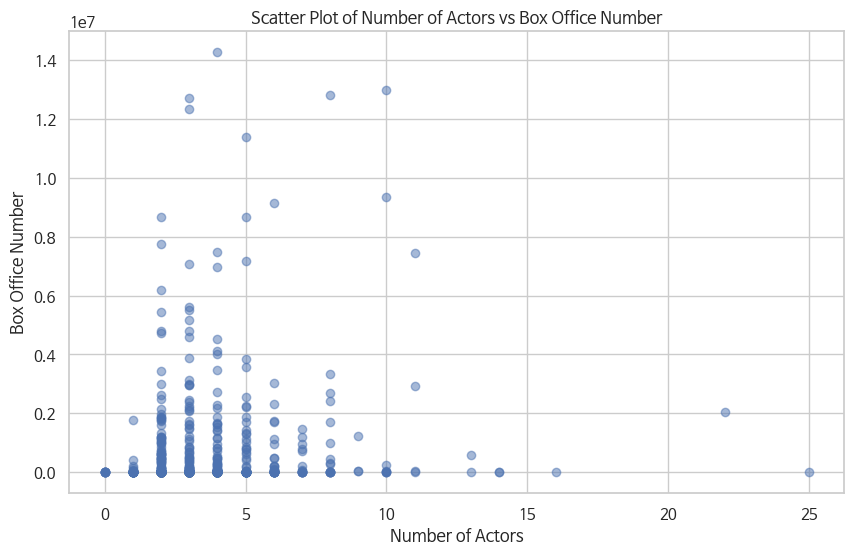

In [63]:
# 산점도
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(train['num_actor'], train['box_off_num'], alpha=0.5)
plt.title('Scatter Plot of Number of Actors vs Box Office Number')
plt.xlabel('Number of Actors')
plt.ylabel('Box Office Number')
plt.grid(True)
plt.show()

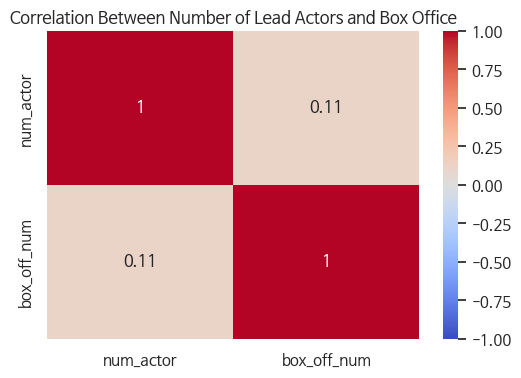

In [64]:
#히트맵
import numpy as np
import seaborn as sns
corr=train[['num_actor','box_off_num']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Correlation Between Number of Lead Actors and Box Office')
plt.show()

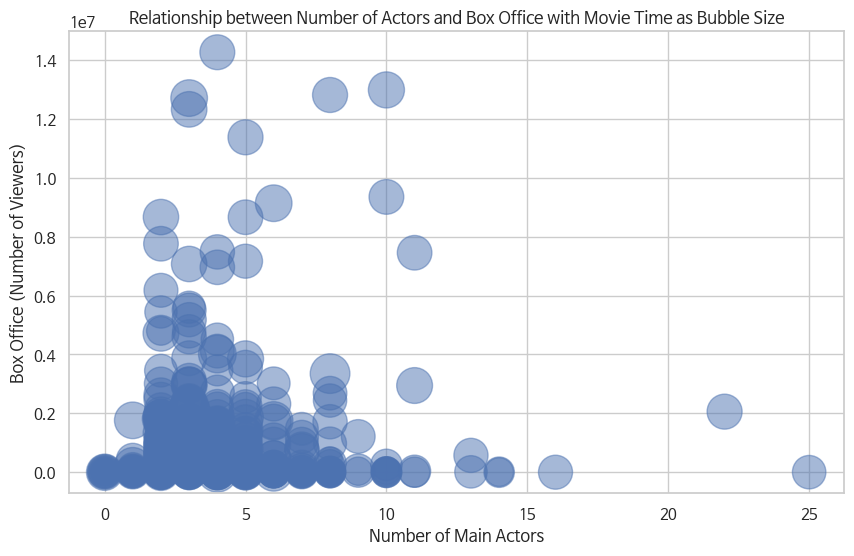

In [65]:
plt.figure(figsize=(10,6))

# 버블 차트 (점의 크기를 상영 시간에 따라 다르게 설정)
plt.scatter(train['num_actor'], train['box_off_num'], s=train['time']*5, alpha=0.5)

plt.title('Relationship between Number of Actors and Box Office with Movie Time as Bubble Size')
plt.xlabel('Number of Main Actors')
plt.ylabel('Box Office (Number of Viewers)')
plt.grid(True)
plt.show()

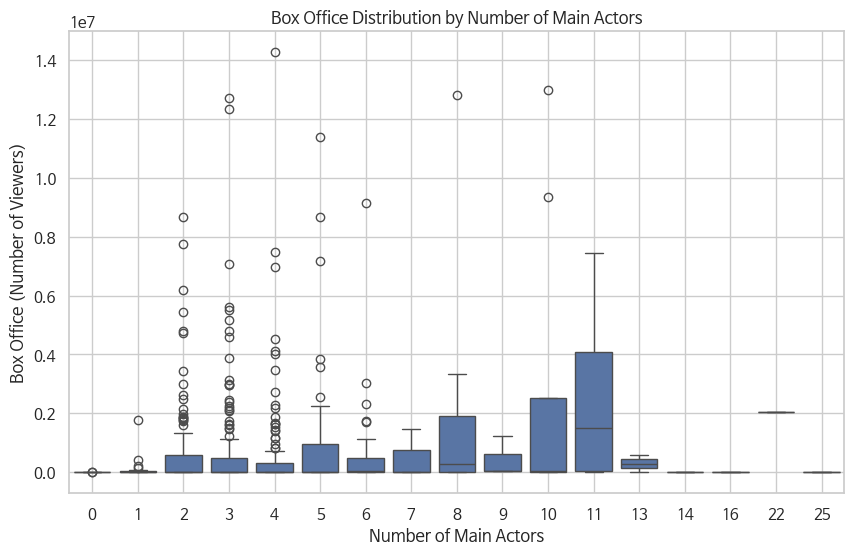

In [66]:
# Box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='num_actor', y='box_off_num', data=train)
plt.title('Box Office Distribution by Number of Main Actors')
plt.xlabel('Number of Main Actors')
plt.ylabel('Box Office (Number of Viewers)')
plt.grid(True)
plt.show()

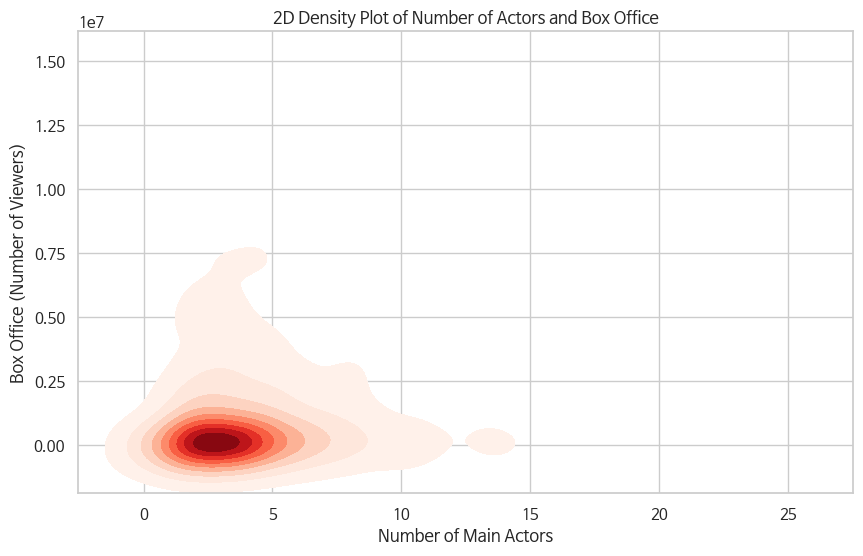

In [67]:
#2D Density Plot
plt.figure(figsize=(10,6))
sns.kdeplot(x=train['num_actor'], y=train['box_off_num'], cmap="Reds", fill=True)
plt.title('2D Density Plot of Number of Actors and Box Office')
plt.xlabel('Number of Main Actors')
plt.ylabel('Box Office (Number of Viewers)')
plt.grid(True)
plt.show()

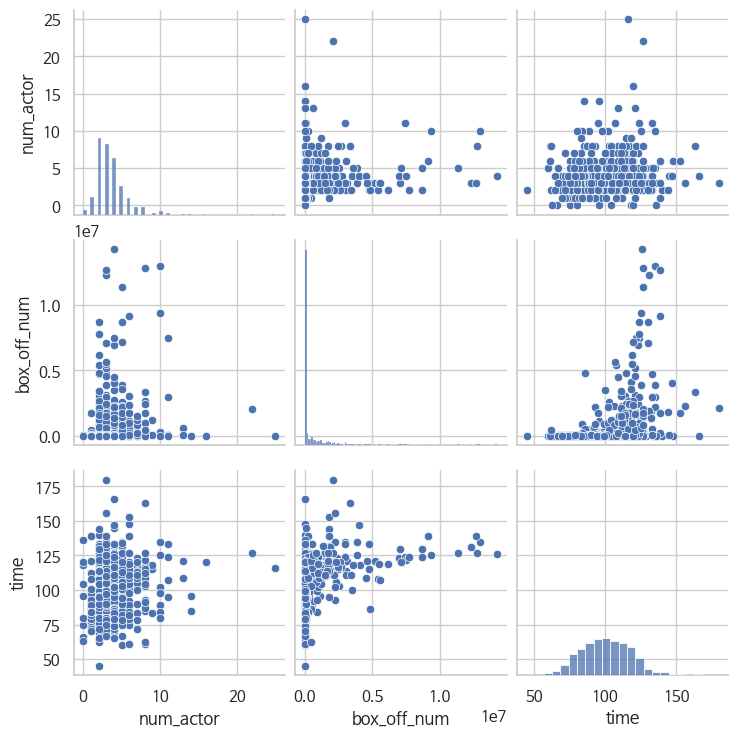

In [68]:
sns.pairplot(train[['num_actor', 'box_off_num', 'time']])
plt.show()

### **상영등급에 따른 관객수 변화**

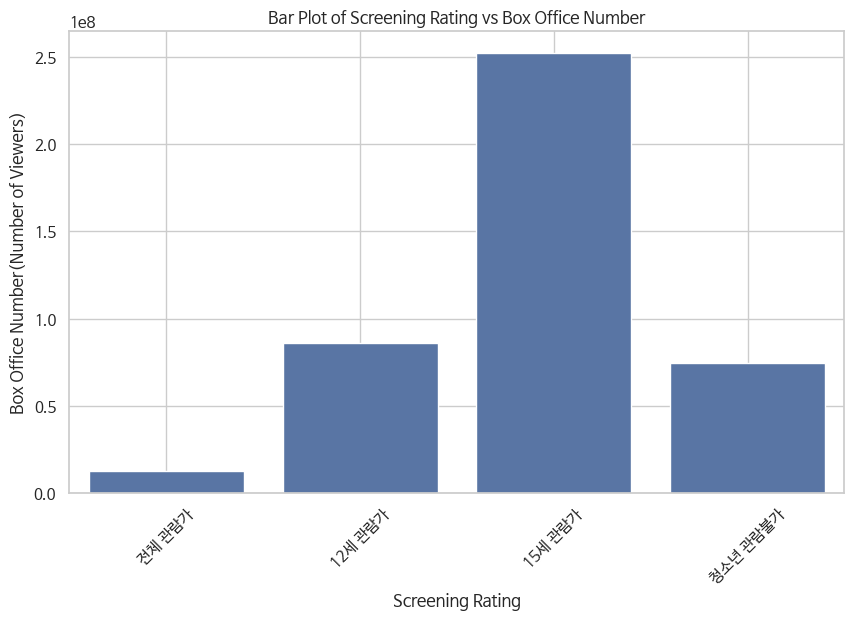

In [69]:
# 막대 그래프

# 상영 등급을 범주형 데이터로 변환하고 순서를 지정
rating_order = ['전체 관람가', '12세 관람가', '15세 관람가', '청소년 관람불가']
train['screening_rat'] = pd.Categorical(train['screening_rat'], categories=rating_order, ordered=True)

# 상영 등급별 평균 관객수 계산
avg_box_office = train.groupby('screening_rat')['box_off_num'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x='screening_rat',y='box_off_num',data=train,estimator=sum,errorbar=None)
plt.title('Bar Plot of Screening Rating vs Box Office Number')
plt.xlabel('Screening Rating')
plt.ylabel('Box Office Number(Number of Viewers)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

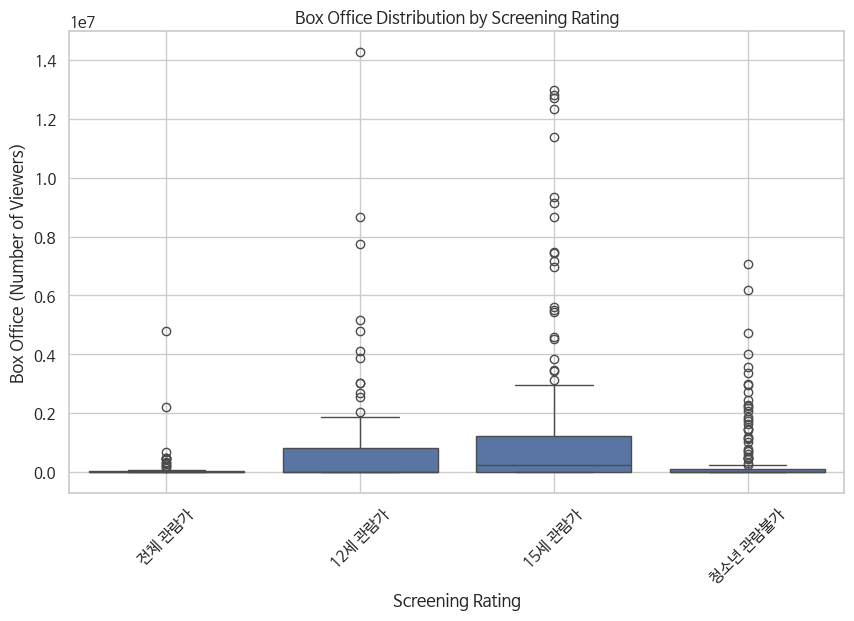

In [70]:
# 박스 플롯

plt.figure(figsize=(10,6))
sns.boxplot(x='screening_rat', y='box_off_num', data=train)
plt.title('Box Office Distribution by Screening Rating')
plt.xlabel('Screening Rating')
plt.ylabel('Box Office (Number of Viewers)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

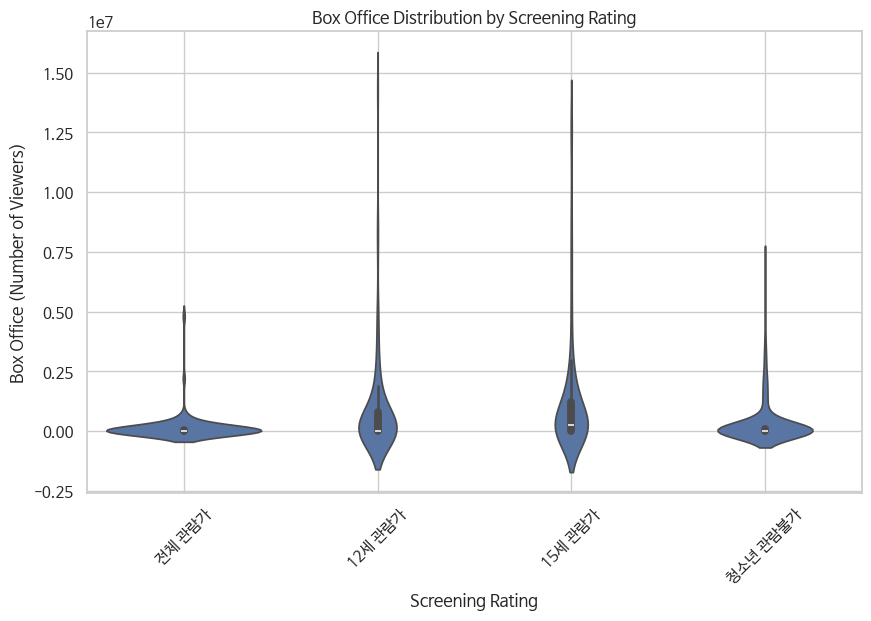

In [71]:
# 바이올린 플롯

plt.figure(figsize=(10,6))
sns.violinplot(x='screening_rat', y='box_off_num', data=train)
plt.title('Box Office Distribution by Screening Rating')
plt.xlabel('Screening Rating')
plt.ylabel('Box Office (Number of Viewers)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

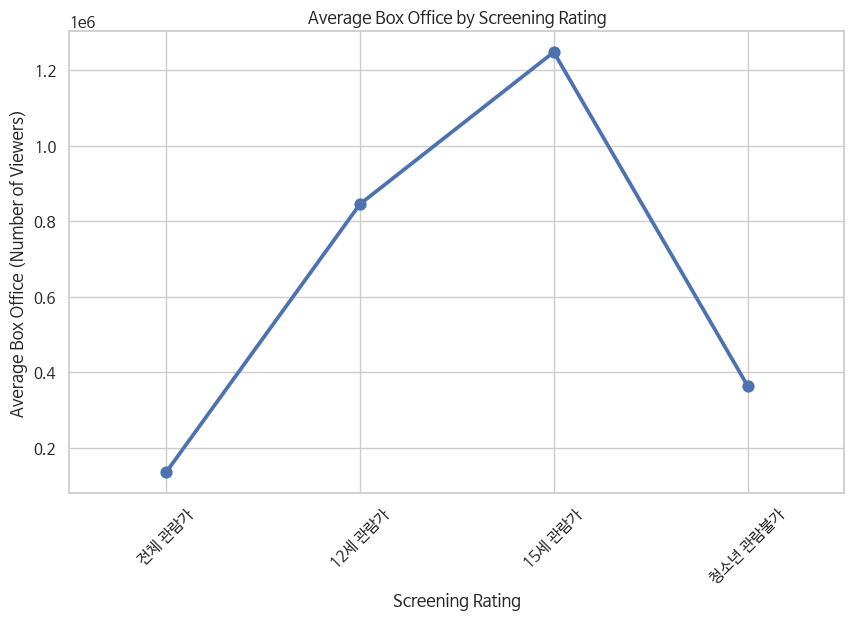

In [72]:
# 포인트 플롯

plt.figure(figsize=(10,6))
sns.pointplot(x='screening_rat', y='box_off_num', data=train, estimator='mean', ci=None)
plt.title('Average Box Office by Screening Rating')
plt.xlabel('Screening Rating')
plt.ylabel('Average Box Office (Number of Viewers)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

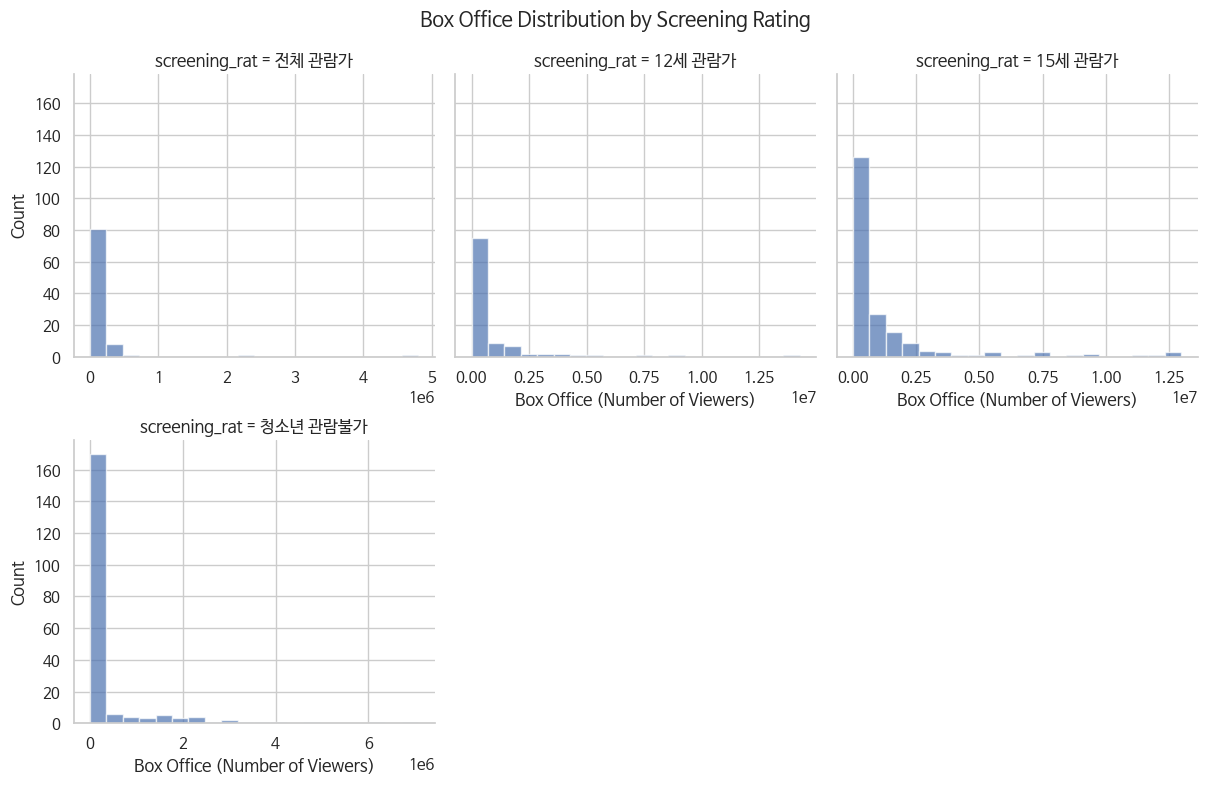

In [73]:
# 히스토그램

g = sns.FacetGrid(train, col="screening_rat", height=4, col_wrap=3, sharex=False)
g.map(plt.hist, "box_off_num", bins=20, color="b", alpha=0.7)
g.set_axis_labels("Box Office (Number of Viewers)", "Count")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Box Office Distribution by Screening Rating')
plt.show()

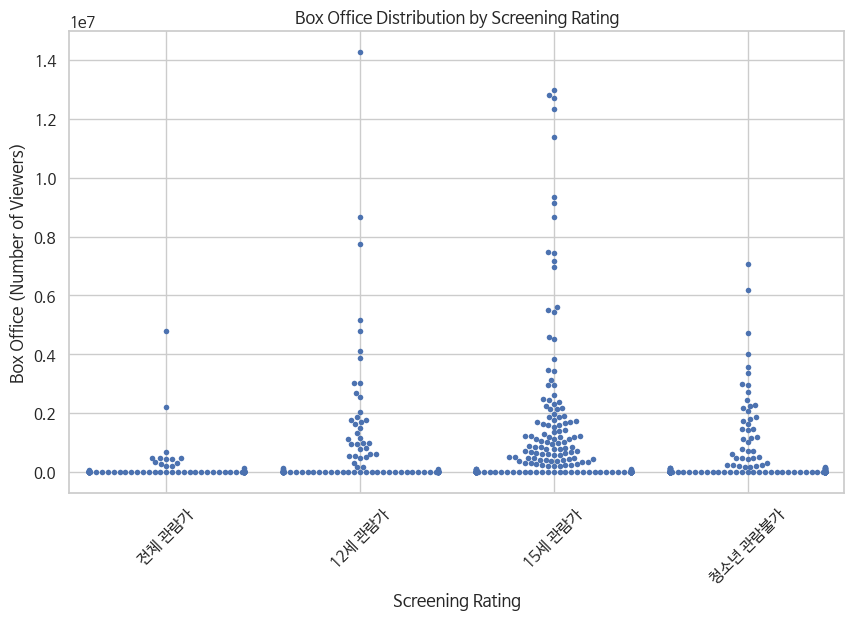

In [74]:
# 스웜 플롯

plt.figure(figsize=(10,6))
sns.swarmplot(x='screening_rat', y='box_off_num', data=train, size=4)
plt.title('Box Office Distribution by Screening Rating')
plt.xlabel('Screening Rating')
plt.ylabel('Box Office (Number of Viewers)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

###**장르별 평균 감동 경력**

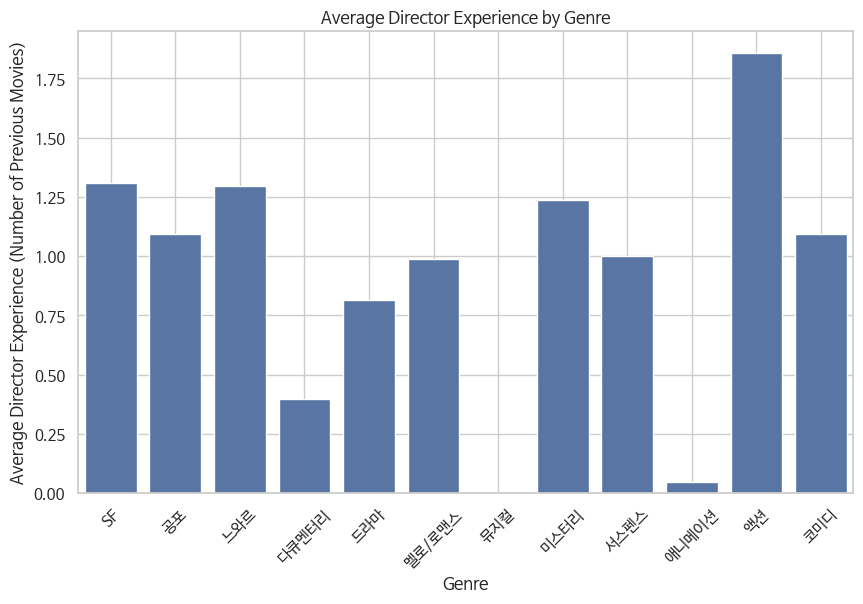

In [75]:
#막대 그래프

# 장르별 평균 감독 경력 계산
avg_director_experience = train.groupby('genre')['dir_prev_num'].mean().reset_index()

# 막대 그래프 그리기
plt.figure(figsize=(10,6))
sns.barplot(x='genre', y='dir_prev_num', data=avg_director_experience)
plt.title('Average Director Experience by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Director Experience (Number of Previous Movies)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

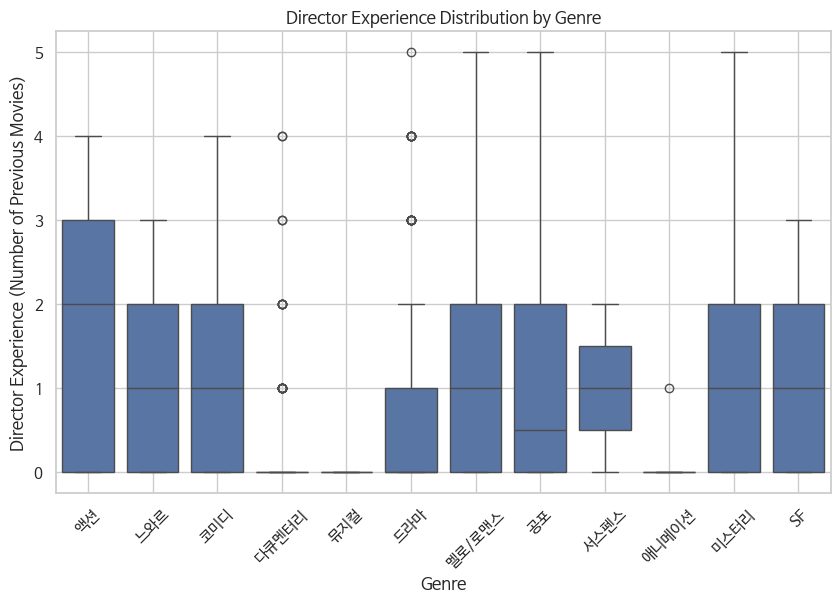

In [76]:
# boxplot

plt.figure(figsize=(10,6))
sns.boxplot(x='genre', y='dir_prev_num', data=train)
plt.title('Director Experience Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Director Experience (Number of Previous Movies)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

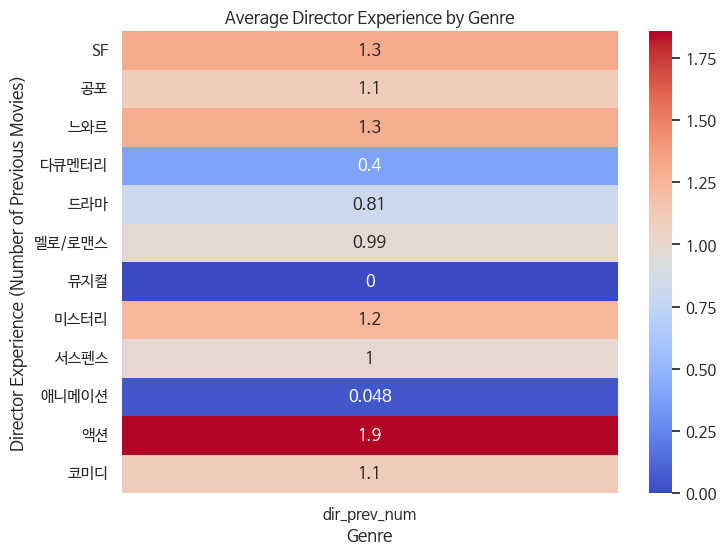

In [77]:
#heatmap

# 장르별 평균 감독 경력 계산
avg_director_experience = train.groupby('genre')['dir_prev_num'].mean().reset_index()

# 히트맵을 위한 피벗 테이블 생성
pivot_table = avg_director_experience.pivot_table(index='genre', values='dir_prev_num')

# 히트맵 그리기
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Average Director Experience by Genre')
plt.xlabel('Genre')
plt.ylabel('Director Experience (Number of Previous Movies)')
plt.show()

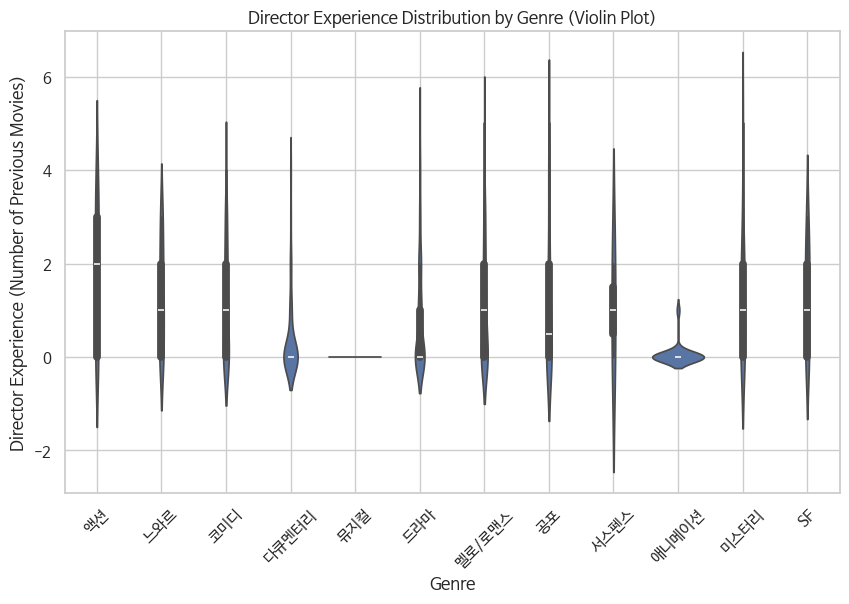

In [78]:
#violin plot

plt.figure(figsize=(10,6))
sns.violinplot(x='genre', y='dir_prev_num', data=train)
plt.title('Director Experience Distribution by Genre (Violin Plot)')
plt.xlabel('Genre')
plt.ylabel('Director Experience (Number of Previous Movies)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### **감독별 영화 수와 평균 관객수**

In [79]:
import seaborn as sns

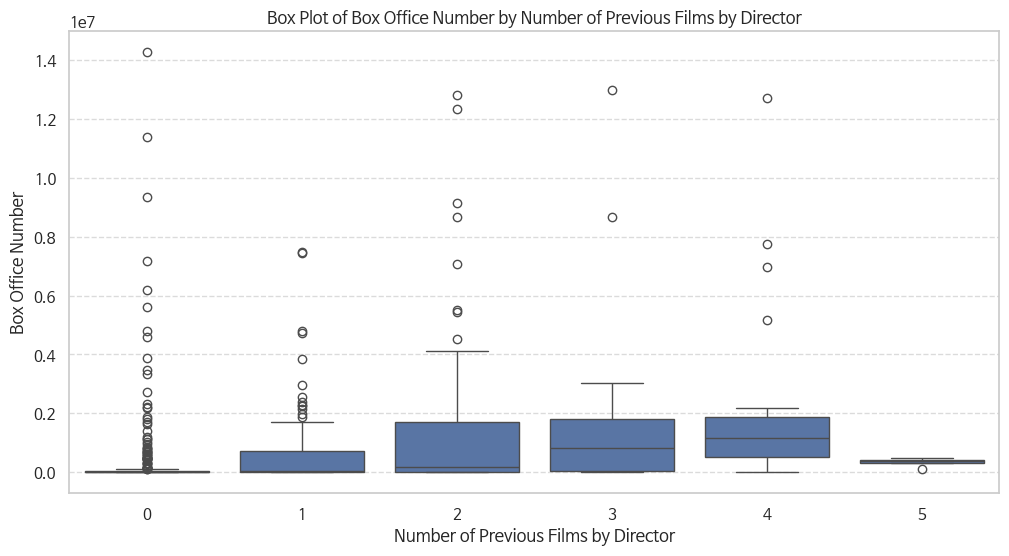

In [80]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='dir_prev_num', y='box_off_num', data=train)
plt.title('Box Plot of Box Office Number by Number of Previous Films by Director')
plt.xlabel('Number of Previous Films by Director')
plt.ylabel('Box Office Number')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **장르별 주연 배우 수와 관객수 관계**

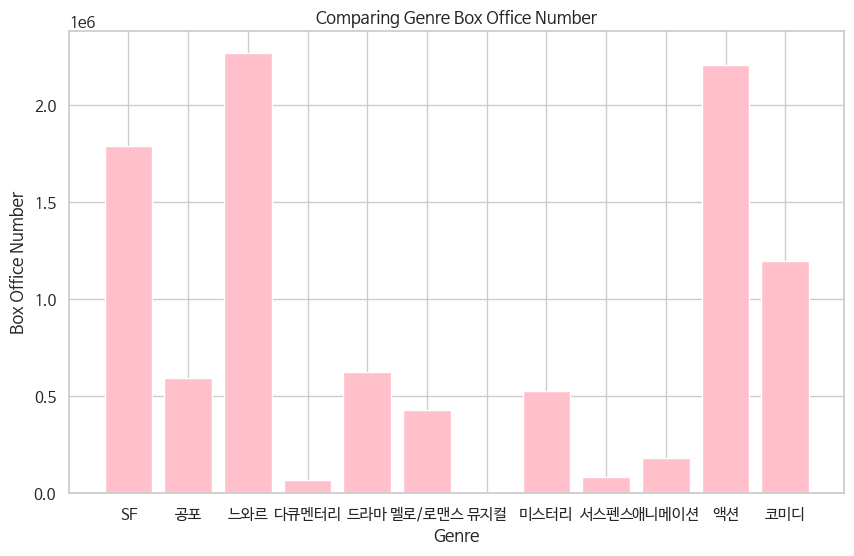

In [81]:
plt.figure(figsize=(10,6))
genre_avg_audience = train.groupby('genre')['box_off_num'].mean()

plt.bar(x=genre_avg_audience.index,height=genre_avg_audience,color='pink')

plt.title('Comparing Genre Box Office Number')
plt.xlabel('Genre')
plt.ylabel('Box Office Number')

plt.show()

### **개봉일과 관객 수 간의 상관관계**

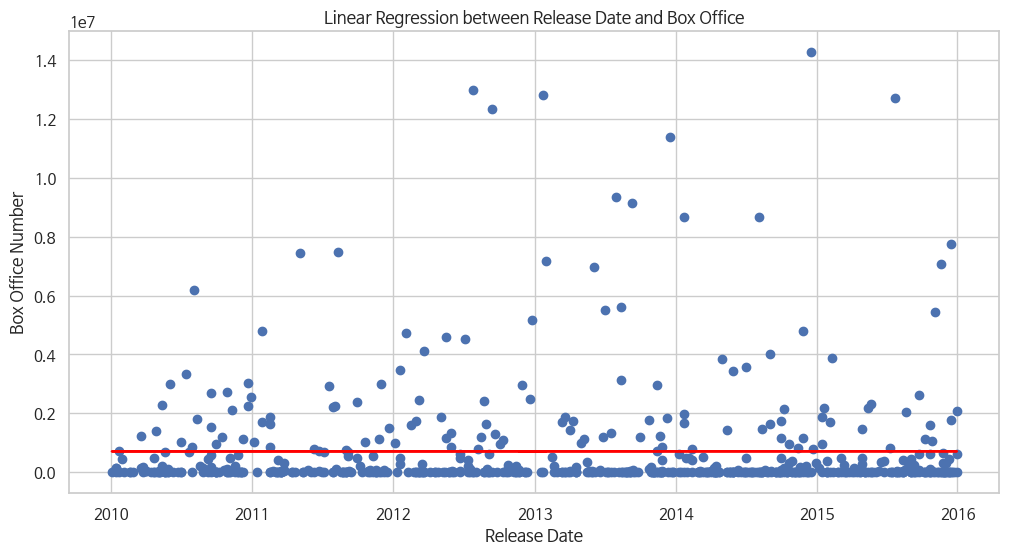

In [82]:
from sklearn.linear_model import LinearRegression
x_dates = pd.to_datetime(train['release_time'])

x_regression = x_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y = train["box_off_num"].values

model = LinearRegression()
model.fit(x_regression, y)

y_pred = model.predict(x_regression)

plt.figure(figsize=(12, 6))
plt.scatter(x_dates, y, label='Actual Data')
plt.plot(x_dates, y_pred, color='red', label='Linear Regression Line')

plt.xlabel('Release Date')
plt.ylabel('Box Office Number')
plt.title('Linear Regression between Release Date and Box Office')
plt.grid(True)
plt.show()